## Imports

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import strftime
import numpy as np

import scrape_url_list as s
import acquire as a
import prepare as p
import explore as e

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import unicodedata
import re

# visualization settings
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')
# sns.set_palette('viridis')

---

In [2]:
# links = s.get_cached_links()

In [3]:
# links = links[:-2]

---

In [4]:
# link_list = []
# for link in links:
#     response = requests.get(link, headers={"user-agent": "Codeup DS"})
#     link_list.append({'link' : link, 'status_code' : response.status_code})

In [5]:
# df = pd.DataFrame(link_list)

In [6]:
# df.head()

In [7]:
# df[df.status_code != 200]

**Takeaways from acquire:**
- The urls were fine when making requests, all returned status code of 200
- But when I tried to use Zach's acquire module to get the needed content, 5 links returned `404` errors
    - Still not sure exaxtly why, but must have to do with the scopes associated with my personal access token and auther permissions or someting
    - Here are the ones that didn't work:
        - `aikorea/awesome-rl/`
        - `JoseDeFreitas/awesome-youtubers#machine-learning`
        - `Developer-Y/cs-video-courses#artificial-intelligence`
        - `Vedenin/useful-java-links#ii-databases-search-engines-big-data-and-machine-learning`
        - `alirezadir/machine-learning-interview-enlightener/blob/main/README.md`

In [8]:
# df = pd.read_json('data.json')

In [9]:
# df.head()

In [10]:
# df.shape

In [11]:
# df.language.value_counts(dropna=False)

In [12]:
# df.loc[0 ,'readme_contents']

---

Get some new links

In [13]:
# response = requests.get('https://github.com/trending', headers={"user-agent": "Codeup DS"})
# soup = BeautifulSoup(response.text)

In [14]:
# len(soup.select('.Box-row'))

In [15]:
# [link.attrs['href'] for link in soup.select_one('.Box').select('a')]

In [16]:
# soup.select_one('.Box').select('a')

In [17]:
# soup.select('.Box-row')[0].select_one('.h3.lh-condensed').a.attrs['href']

In [18]:
# boxes = soup.select('.Box-row')

In [19]:
# len(boxes)

In [20]:
# link_list = []
# for box in boxes:
#     link = box.select_one('.h3.lh-condensed').a.attrs['href']
#     link_list.append(link)

In [21]:
# link_list

In [22]:
# there are only 25 links here that are classified as trending

---

Most forked

In [23]:
# url = 'https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=forks&type=Repositories'

In [24]:
# # get first page
# response = requests.get(url, headers={"user-agent": "Codeup DS"})
# soup = BeautifulSoup(response.text)

In [25]:
# len(soup.select('.repo-list-item'))

In [26]:
# cards = soup.select('.repo-list-item')

In [27]:
# len(cards)

In [28]:
# cards[0].select_one('.v-align-middle').attrs['href']

In [29]:
# link_list = []
# for card in cards:
#     link = card.select_one('.v-align-middle').attrs['href']
#     link_list.append(link)

In [30]:
# link_list

In [31]:
# # get 10 pages
# url = 'https://github.com/search?o=desc&p={}&q=stars%3A%3E1&s=forks&type=Repositories'

In [32]:
# url = url.format(1)

In [33]:
# url

In [34]:
# response = requests.get(url, headers={"user-agent": "Codeup DS"})

In [35]:
# response

In [36]:
# soup = BeautifulSoup(response.text)

In [37]:
# cards = soup.select('.repo-list-item')

In [38]:
# len(cards)

In [39]:
# link_list = []
# for i in range(1,10):
#     url = 'https://github.com/search?o=desc&p={}&q=stars%3A%3E1&s=forks&type=Repositories'
#     url = url.format(i)
#     response = requests.get(url, headers={"user-agent": "Codeup DS"})
#     soup = BeautifulSoup(response.text)
#     cards = soup.select('.repo-list-item')
#     for card in cards:
#         link = card.select_one('.v-align-middle').attrs['href']
#         link_list.append(link)
    

In [40]:
# # this is the function that I used to get the top 500 most forked repos on github
# from time import sleep
# cards_list = []
# link_list = []
# for i in range(1,51):
#     url = 'https://github.com/search?o=desc&p={}&q=stars%3A%3E1&s=forks&type=Repositories'
#     url = url.format(i)
#     response = requests.get(url, headers={"user-agent": "Codeup"})
#     print(response.status_code)
#     soup = BeautifulSoup(response.text)
#     cards = soup.select('.repo-list-item')
#     cards_list.append(cards)
#     #print(i)
#     #print(url)
#     #print(len(cards))
#     #print(len(cards_list))
#     for card in cards:
#         link = card.select_one('.v-align-middle').attrs['href']
#         link_list.append(link)
#     sleep(30)
# [link[1:] for link in link_list]

In [41]:
# len(link_list)

In [42]:
# link_list[0][1:]

In [43]:
# [link[1:] for link in link_list]

---

In [2]:
df = pd.read_json('data.json')

In [4]:
df.shape

(500, 3)

In [5]:
df.language.value_counts(dropna=False)

JavaScript          100
Java                 77
NaN                  60
Python               54
C++                  30
Jupyter Notebook     26
TypeScript           26
Go                   19
HTML                 16
C                    15
PHP                  12
Ruby                 11
Shell                 8
Kotlin                5
CSS                   5
Swift                 4
C#                    4
Vue                   3
Rascal                3
Nix                   2
R                     2
Dart                  2
Objective-C           2
Scala                 2
Dockerfile            1
TeX                   1
Less                  1
PowerShell            1
Groovy                1
Vim script            1
Nunjucks              1
Assembly              1
SCSS                  1
ApacheConf            1
Rich Text Format      1
Rust                  1
Name: language, dtype: int64

In [6]:
df.shape

(500, 3)

In [7]:
df.isna().sum()

repo                0
language           60
readme_contents     0
dtype: int64

In [8]:
df.dropna().shape

(440, 3)

In [9]:
df = p.prep_nlp(df, original_text_col='readme_contents')

In [10]:
df.shape

(261, 6)

In [82]:
df.language.value_counts()

JavaScript          100
Java                 77
Python               54
C++                  30
TypeScript           26
Jupyter Notebook     26
Go                   19
HTML                 16
C                    15
PHP                  12
Ruby                 11
Shell                 8
Kotlin                5
CSS                   5
C#                    4
Swift                 4
Rascal                3
Vue                   3
R                     2
Nix                   2
Scala                 2
Objective-C           2
Dart                  2
TeX                   1
Dockerfile            1
Less                  1
Rust                  1
Nunjucks              1
PowerShell            1
Vim script            1
SCSS                  1
Groovy                1
ApacheConf            1
Assembly              1
Rich Text Format      1
Name: language, dtype: int64

In [83]:
# # need to lump all except top 4 as other
# top4 = ['JavaScript', 'Java', 'Python', 'C++']
# np.where((df['language'] if not in top4), 'Other', df['language'])
# # couldn't get npwhere to work with in operator

In [84]:
# df['county'] = df['fips'].apply(lambda x: 'Los Angeles' if x == 6037 else 'Orange' if x == 6059 else 'Ventura') # convert to county names

In [85]:
top4 = ['JavaScript', 'Java', 'Python', 'C++']
df.language = df.language.apply(lambda x: 'Other' if x not in top4 else x)

In [ ]:
# instead of lumping, let's just drop all others

In [86]:
df.language.value_counts()

Other         179
JavaScript    100
Java           77
Python         54
C++            30
Name: language, dtype: int64

In [92]:
df.shape

(440, 6)

In [94]:
df = df[df.language != 'Other']

In [95]:
df.shape

(261, 6)

In [87]:
def split_readme(df):
    '''
    This function takes in a df and splits it into train, validate, and test dfs
    final proportions will be 60/20/20 for train/validate/test
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.language)
    train, validate = train_test_split(train_validate, test_size=.25, random_state=123, stratify=train_validate.language)
    return train, validate, test

In [88]:
train, validate, text = p.split_readme(df)

In [89]:
train.shape, validate.shape, text.shape

((264, 6), (88, 6), (88, 6))

In [11]:
df = pd.read_json('data.json')

In [12]:
df.shape

(500, 3)

In [13]:
df.language.value_counts()

JavaScript          100
Java                 77
Python               54
C++                  30
TypeScript           26
Jupyter Notebook     26
Go                   19
HTML                 16
C                    15
PHP                  12
Ruby                 11
Shell                 8
CSS                   5
Kotlin                5
C#                    4
Swift                 4
Rascal                3
Vue                   3
R                     2
Nix                   2
Dart                  2
Objective-C           2
Scala                 2
ApacheConf            1
Vim script            1
TeX                   1
Groovy                1
PowerShell            1
Less                  1
Dockerfile            1
Rich Text Format      1
Nunjucks              1
Assembly              1
SCSS                  1
Rust                  1
Name: language, dtype: int64

In [14]:
df = p.prep_nlp(df, original_text_col='readme_contents')

In [16]:
df.language.value_counts()

JavaScript    100
Java           77
Python         54
C++            30
Name: language, dtype: int64

In [19]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
3,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www....",div aligncenter img srchttpswwwtensorfloworgim...,div aligncent img srchttpswwwtensorfloworgimag...,div aligncenter img srchttpswwwtensorfloworgim...
5,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...
8,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...
11,opencv/opencv,C++,## OpenCV: Open Source Computer Vision Library...,opencv open source computer vision library res...,opencv open sourc comput vision librari resour...,opencv open source computer vision library res...
13,CyC2018/CS-Notes,Java,"<div align=""center"">\r\n <a href=""https://w...",div aligncenter hrefhttpswwwcyc2018xyz img src...,div aligncent hrefhttpswwwcyc2018xyz img srcht...,div aligncenter hrefhttpswwwcyc2018xyz img src...


In [17]:
train, validate, test = p.split_readme(df)

Train Proportion: 0.60 (156 rows)
Validate Proportion: 0.20 (52 rows)    
Test Proportion: 0.20 (53 rows)


In [20]:
df.shape

(261, 6)

In [ ]:
df = pd.read_json('data.json')
df = p.prep_nlp(df, original_text_col='readme_contents')
train, validate, test = p.split_readme(df)

In [21]:
train.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
275,microsoft/Windows-universal-samples,JavaScript,<!---\n samplefwlink: http://go.microsoft.com...,samplefwlink httpgomicrosoftcomfwlinkplinkid61...,samplefwlink httpgomicrosoftcomfwlinkplinkid61...,samplefwlink httpgomicrosoftcomfwlinkplinkid61...
117,scutan90/DeepLearning-500-questions,JavaScript,\n# 京东售卖链接：https://item.jd.com/12785031.html\n...,httpsitemjdcom12785031html 100 500ai 141347cnn...,httpsitemjdcom12785031html 100 500ai 141347cnn...,httpsitemjdcom12785031html 100 500ai 141347cnn...
494,actionsdemos/calculator,JavaScript,Calculator.js: a node.js Demonstration Project...,calculatorjs nodejs demonstration project exam...,calculatorj nodej demonstr project exampl node...,calculatorjs nodejs demonstration project exam...
218,apple/swift,C++,"<img src=""https://swift.org/assets/images/swif...",img srchttpsswiftorgassetsimagesswiftsvg altsw...,img srchttpsswiftorgassetsimagesswiftsvg altsw...,img srchttpsswiftorgassetsimagesswiftsvg altsw...
357,macrozheng/mall-learning,Java,"# mall学习教程\n<p>\n <a href=""#公众号""><img src=""...",mall p hrefimg srchttpmacroossosscnshenzhenali...,mall p hrefimg srchttpmacroossosscnshenzhenali...,mall p hrefimg srchttpmacroossosscnshenzhenali...


---
## Exploration
---

To do for MVP:
- value counts and ratios
- create lists of words that appear in each class
    - combine into single df and do some exploration there (see curriculum)
- create stacked bar chart for 20 most commonly occuring words
    - single words
    - bigrams
    - trigrams
- word clouds for single words for each class
    - look into making the shape of the cloud unique to each language

In [2]:
# aquire, prep and split data
df = pd.read_json('data.json')
df = p.prep_nlp(df, original_text_col='readme_contents', extra_words=['&#9;'])
train, validate, test = p.split_readme(df)

Train Proportion: 0.60 (156 rows)
Validate Proportion: 0.20 (52 rows)    
Test Proportion: 0.20 (53 rows)


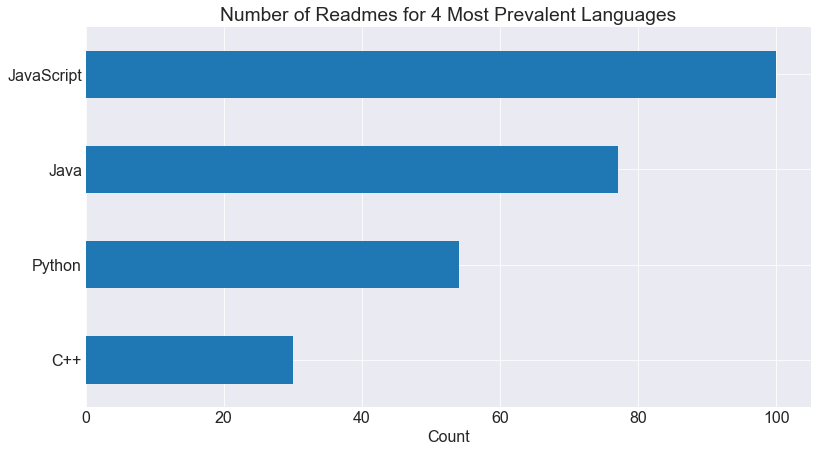

In [3]:
df.language.value_counts().sort_values(ascending = True).plot.barh()
plt.title('Number of Readmes for 4 Most Prevalent Languages')
plt.xlabel("Count");

In [4]:
train.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
275,microsoft/Windows-universal-samples,JavaScript,<!---\n samplefwlink: http://go.microsoft.com...,samplefwlink httpgomicrosoftcomfwlinkplinkid u...,samplefwlink httpgomicrosoftcomfwlinkplinkid u...,samplefwlink httpgomicrosoftcomfwlinkplinkid u...
117,scutan90/DeepLearning-500-questions,JavaScript,\n# 京东售卖链接：https://item.jd.com/12785031.html\n...,httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...,httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...,httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...
494,actionsdemos/calculator,JavaScript,Calculator.js: a node.js Demonstration Project...,calculatorjs nodejs demonstration project exam...,calculatorj nodej demonstr project exampl node...,calculatorjs nodejs demonstration project exam...
218,apple/swift,C++,"<img src=""https://swift.org/assets/images/swif...",img srchttpsswiftorgassetsimagesswiftsvg altsw...,img srchttpsswiftorgassetsimagesswiftsvg altsw...,img srchttpsswiftorgassetsimagesswiftsvg altsw...
357,macrozheng/mall-learning,Java,"# mall学习教程\n<p>\n <a href=""#公众号""><img src=""...",mall p hrefimg srchttpmacroossosscnshenzhenali...,mall p hrefimg srchttpmacroossosscnshenzhenali...,mall p hrefimg srchttpmacroossosscnshenzhenali...


In [5]:
# rename train to df to simplify code here
df = train.copy()

In [6]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
275,microsoft/Windows-universal-samples,JavaScript,<!---\n samplefwlink: http://go.microsoft.com...,samplefwlink httpgomicrosoftcomfwlinkplinkid u...,samplefwlink httpgomicrosoftcomfwlinkplinkid u...,samplefwlink httpgomicrosoftcomfwlinkplinkid u...
117,scutan90/DeepLearning-500-questions,JavaScript,\n# 京东售卖链接：https://item.jd.com/12785031.html\n...,httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...,httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...,httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...
494,actionsdemos/calculator,JavaScript,Calculator.js: a node.js Demonstration Project...,calculatorjs nodejs demonstration project exam...,calculatorj nodej demonstr project exampl node...,calculatorjs nodejs demonstration project exam...
218,apple/swift,C++,"<img src=""https://swift.org/assets/images/swif...",img srchttpsswiftorgassetsimagesswiftsvg altsw...,img srchttpsswiftorgassetsimagesswiftsvg altsw...,img srchttpsswiftorgassetsimagesswiftsvg altsw...
357,macrozheng/mall-learning,Java,"# mall学习教程\n<p>\n <a href=""#公众号""><img src=""...",mall p hrefimg srchttpmacroossosscnshenzhenali...,mall p hrefimg srchttpmacroossosscnshenzhenali...,mall p hrefimg srchttpmacroossosscnshenzhenali...


---
### Word Counts

In [7]:
df.language.value_counts()

JavaScript    60
Java          46
Python        32
C++           18
Name: language, dtype: int64

In [8]:
# combine all readmes for each class into a single string
js_words = ' '.join(df[df.language == 'JavaScript'].clean)
j_words = ' '.join(df[df.language == 'Java'].clean)
py_words = ' '.join(df[df.language == 'Python'].clean)
c_words = ' '.join(df[df.language == 'C++'].clean)
all_words = ' '.join(df.clean)

In [9]:
# represent as frequencies
js_freq = pd.Series(js_words.split()).value_counts()
js_freq

javascript                                                          784
const                                                               354
function                                                            347
td                                                                  309
tr                                                                  295
                                                                   ... 
classslicknextnextbutton                                              1
httpsgithubcomhbphtmlboilerplatehttpsgithubcomhbphtmlboilerplate      1
independent                                                           1
telegram                                                              1
fulltimep                                                             1
Length: 10464, dtype: int64

In [10]:
j_freq = pd.Series(j_words.split()).value_counts()
j_freq

tdimg                                          289
alttd                                          276
spring                                         177
java                                           145
tr                                             128
                                              ... 
altsentinel                                      1
explanationhttpwwwiocodercncategoriesapollo      1
kattishttpsopenkattiscom                         1
httpwwwmybatisorggeneratorindexhtml              1
httpswwwdockercom                                1
Length: 5958, dtype: int64

In [11]:
py_freq = pd.Series(py_words.split()).value_counts()
py_freq

learning                                                                                   483
python                                                                                     382
machine                                                                                    368
youtubedl                                                                                  306
video                                                                                      284
                                                                                          ... 
httpsgithubcompythoncpythonblobmaindocreadmerst                                              1
regulations                                                                                  1
rashwan                                                                                      1
theelementsofstatisticallearninghttpsgithubcommaitbayevtheelementsofstatisticallearning      1
fused                                             

In [12]:
c_freq = pd.Series(c_words.split()).value_counts()
c_freq

&#9;                                     126
build                                    114
c                                        101
int                                       82
new                                       72
                                        ... 
leap                                       1
apollocachebazelbuildrepos                 1
communityhttpsforumkoditv                  1
toolboxdocadvancedcalibrationmodulemd      1
inputs                                     1
Length: 4746, dtype: int64

In [13]:
all_freq = pd.Series(all_words.split()).value_counts()
all_freq

javascript                                                834
use                                                       600
code                                                      537
learning                                                  531
tr                                                        438
                                                         ... 
neardropin                                                  1
inproceedingsweicpm                                         1
docsdemoguideimageshardwareconnectionpng                    1
httpsgithubcomswaggerapiswaggerui                           1
predicthttpswwwfangzhipengcomspringcloudscfgatewayhtml      1
Length: 24966, dtype: int64

In [14]:
df.language.value_counts()

JavaScript    60
Java          46
Python        32
C++           18
Name: language, dtype: int64

In [15]:
# concat all frequencies together into single df
word_counts = pd.concat([js_freq, j_freq, py_freq, c_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['JavaScript', 'Java', 'Python', 'C++', 'All']
word_counts.head()

,JavaScript,Java,Python,C++,All
javascript,784,13,34,3,834
const,354,0,0,52,406
function,347,1,5,17,370
td,309,13,10,2,334
tr,295,128,0,15,438


In [16]:
# sort by all
top20 = word_counts.sort_values('All', ascending=False).head(20)

In [17]:
top20

,JavaScript,Java,Python,C++,All
javascript,784,13,34,3,834
use,254,85,217,44,600
code,239,81,174,43,537
learning,24,0,483,24,531
tr,295,128,0,15,438
data,102,22,283,29,436
python,8,10,382,35,435
using,125,42,177,67,411
const,354,0,0,52,406
machine,4,1,368,9,382


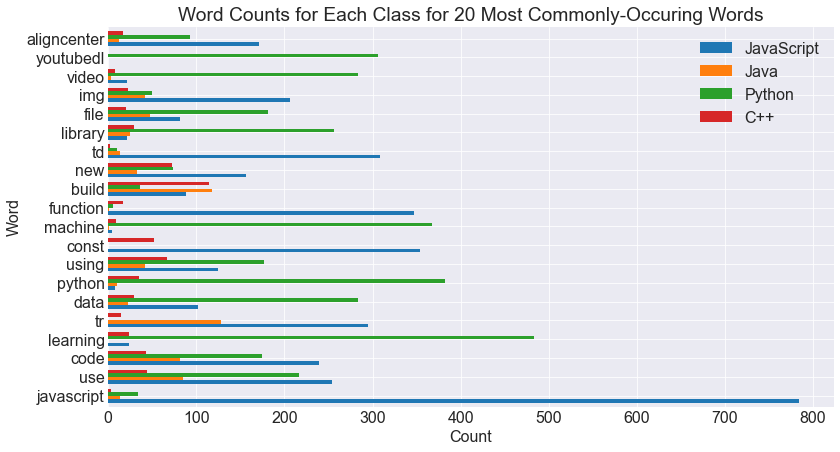

In [18]:
# visualize this
top20.drop(columns='All').plot.barh(width=0.75)
plt.title('Word Counts for Each Class for 20 Most Commonly-Occuring Words')
plt.xlabel('Count')
plt.ylabel('Word');

**Takeaways:*
- Language name is near the top in most lists
- There are some other words the mostly show up in one language
    - video - Python
    - img - JS
    - library - Python
    - td - JS
    - function - JS
    - machine - Python
    - const - JS
    - python - Python
    - data - Python
    - tr - JS
    - learning - Python
    - javascript - JS

In [19]:
def plot_stacked_all(word_counts):
    '''
    Takes in word_counts df with an 'All' column and produces stacked bar chart for each category for top num_top words in all classes
    '''
    (word_counts.sort_values('All', ascending=False)
     .head(20)
     .apply(lambda row: row/row['All'], axis = 1)
     .drop(columns = 'All')
     .sort_values(by = 'JavaScript')
     .plot.barh(stacked = True, width = 1, ec = 'lightgrey')
    )
    plt.title('Proportion of Total Count for Each Class for 20 Most-Commonly Occuring Words')
    plt.legend(bbox_to_anchor= (1.03,1))
    plt.xlabel('Proportion')
    plt.ylabel('Word');

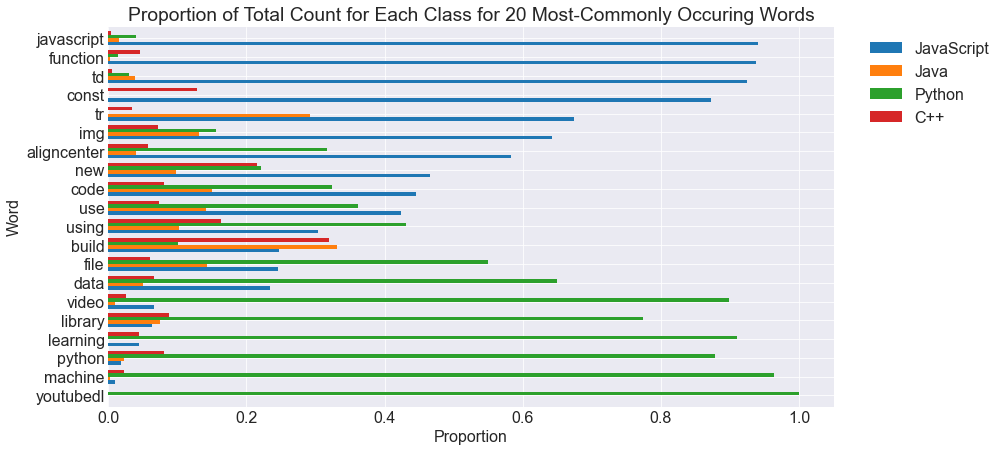

In [20]:
e.plot_bar_all(word_counts)

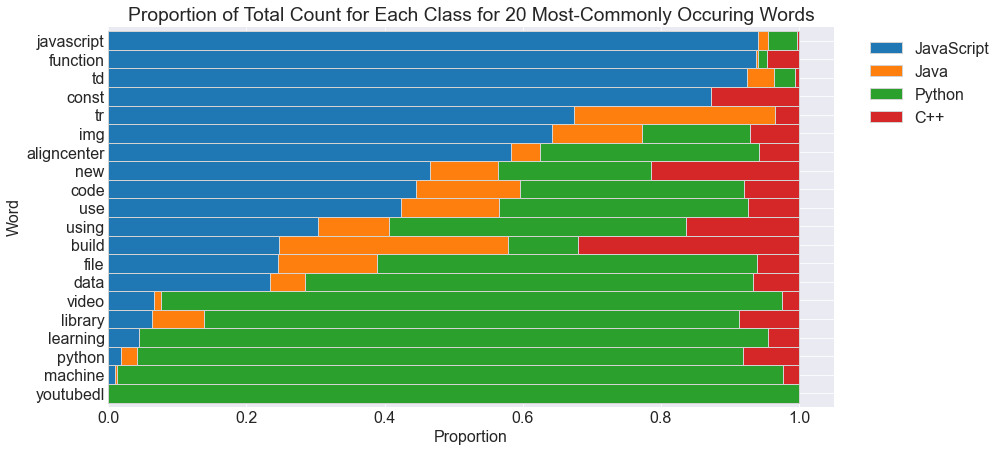

In [21]:
e.plot_stacked_all(word_counts)

In [22]:
def plot_bar_all(word_counts):
    '''
    Takes in word_counts df with an 'All' column and produces bar chart for each category for top num_top words in all classes
    '''
    (word_counts.sort_values('All', ascending=False)
     .head(20)
     .apply(lambda row: row/row['All'], axis = 1)
     .drop(columns = 'All')
     .sort_values(by = 'JavaScript')
     .plot.barh(width=0.75)
    )
    plt.title('Proportion of Total Count for Each Class for 20 Most-Commonly Occuring Words')
    plt.legend(bbox_to_anchor= (1.03,1))
    plt.xlabel('Proportion')
    plt.ylabel('Word');

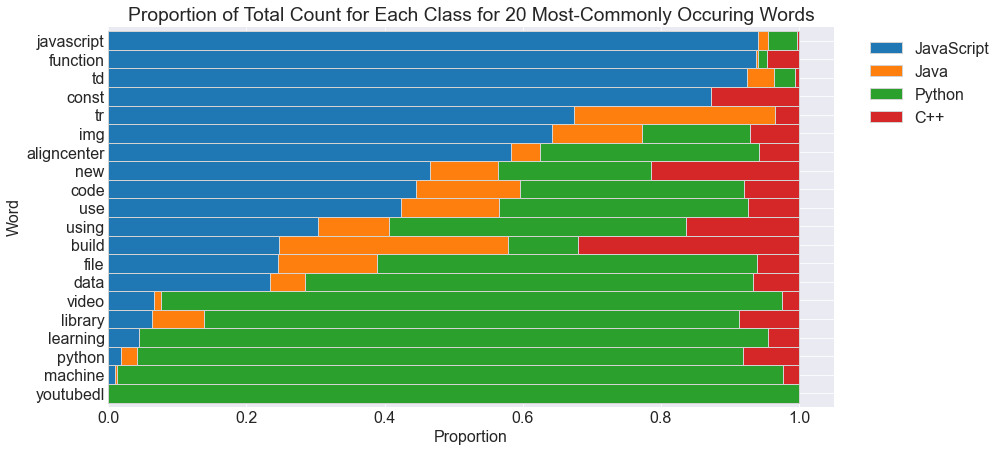

In [24]:
(word_counts.sort_values('All', ascending=False)
 .head(20)
 .apply(lambda row: row/row['All'], axis = 1)
 .drop(columns = 'All')
 .sort_values(by = 'JavaScript')
 .plot.barh(stacked = True, width = 1, ec = 'lightgrey')
)
plt.title('Proportion of Total Count for Each Class for 20 Most-Commonly Occuring Words')
plt.legend(bbox_to_anchor= (1.03,1))
plt.xlabel('Proportion')
plt.ylabel('Word');

Take a look for top 20 occuring words within each class (instead of all)

In [25]:
def plot_stacked_bar(word_counts, category, num_top = 20, cmap = None):
    '''
    Takes in word_counts df with an 'All' column and produces stacked bar chart for each category for top num_top words in the class specified by category argument
    '''
    plt.figure(figsize=(16, 9))
    plt.rc('font', size=16)
    (word_counts.sort_values(by=category, ascending=False)
     .head(num_top)
     .apply(lambda row: row / row['All'], axis=1)
     .drop(columns='All')
     .sort_values(by=category)
     .plot.barh(stacked=True, width=1, ec='lightgrey', cmap = cmap, alpha = 1))
    plt.legend(bbox_to_anchor= (1.03,1))
    plt.title(f'Proportions of Most Commonly-Occuring {num_top} {category} Readme Words\n')
    plt.xlabel('Proportion')
    plt.ylabel('Word');
    # make tick labels display as percentages
    # plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
    plt.show();

In [26]:
languages = word_counts.columns.to_list()[:-1]
languages

['JavaScript', 'Java', 'Python', 'C++']

<Figure size 1152x648 with 0 Axes>

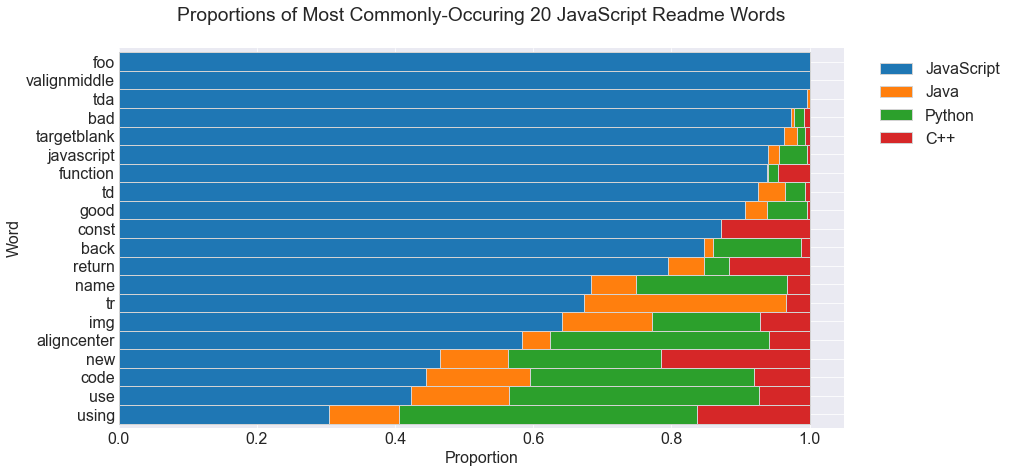

<Figure size 1152x648 with 0 Axes>

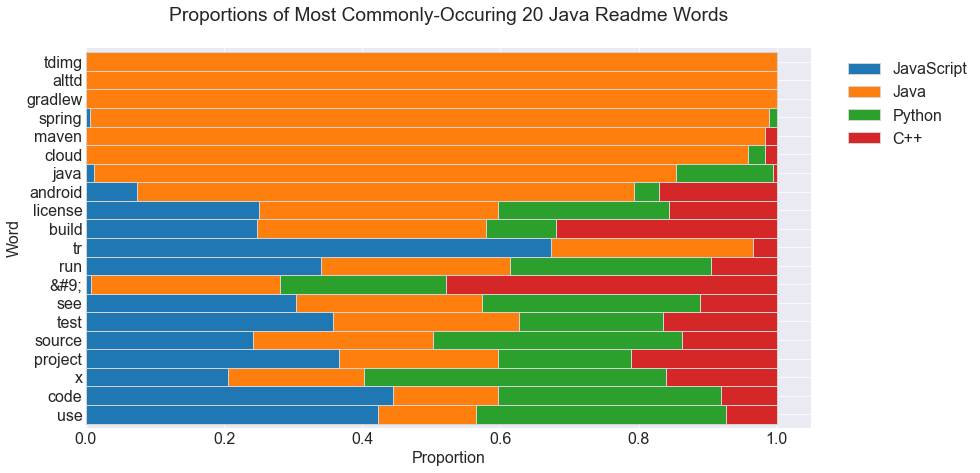

<Figure size 1152x648 with 0 Axes>

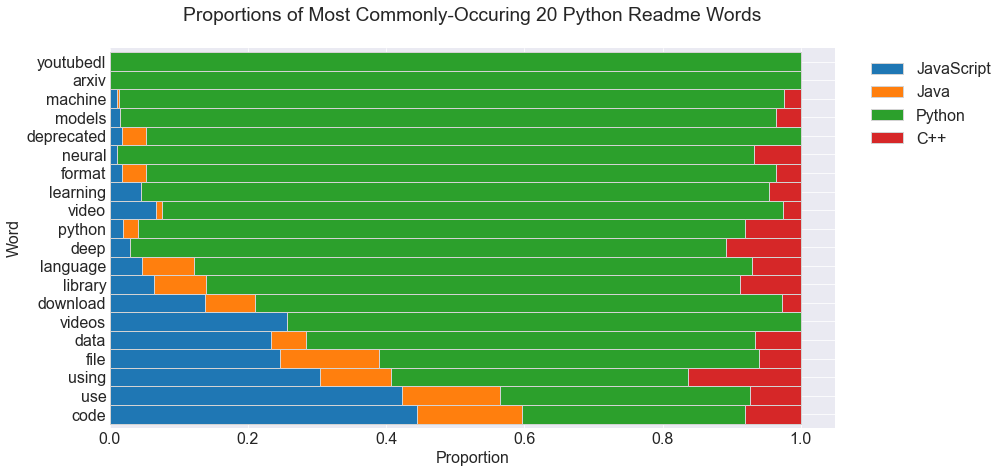

<Figure size 1152x648 with 0 Axes>

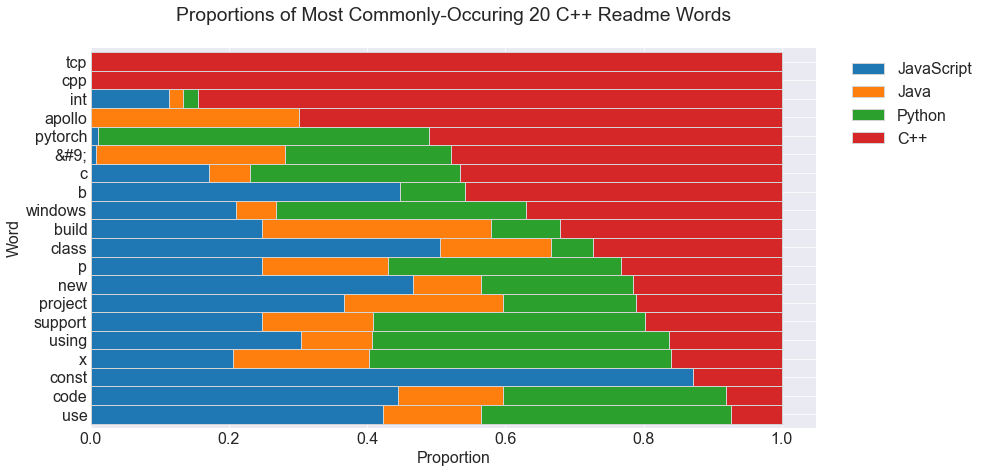

In [27]:
for language in languages:
    e.plot_stacked_bar(word_counts, language);

In [28]:
def plot_horizontal_bar(word_counts, category, num_top = 20, cmap = None):
    '''
    Takes in word_counts df with an 'All' column and produces bar chart for each category for top num_top words in the class specified by category argument
    '''
    plt.figure(figsize=(16, 9))
    plt.rc('font', size=16)
    (word_counts.sort_values(by=category, ascending=False)
     .head(num_top)
     .apply(lambda row: row / row['All'], axis=1)
     .drop(columns='All')
     .sort_values(by=category)
     .plot.barh(width=0.75))
    plt.title(f'Proportions of Most Commonly-Occuring {num_top} {category} Readme Words\n')
    plt.xlabel('Proportion')
    plt.ylabel('Word')
    # make tick labels display as percentages
    # plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
    plt.show();

<Figure size 1152x648 with 0 Axes>

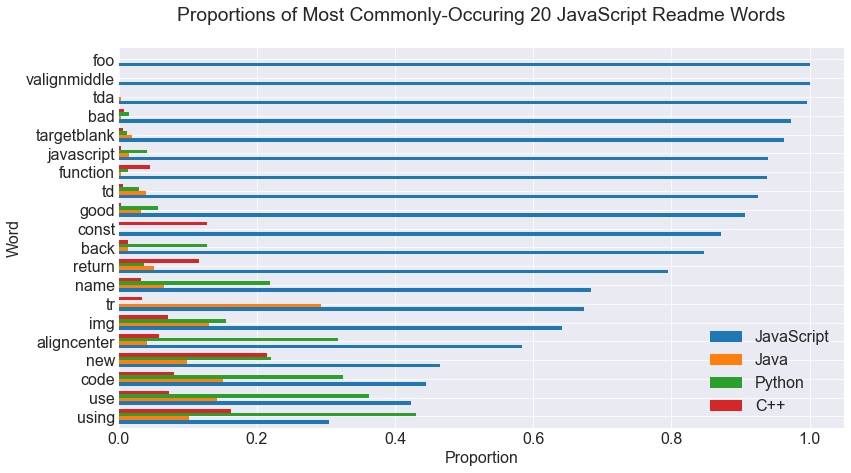

<Figure size 1152x648 with 0 Axes>

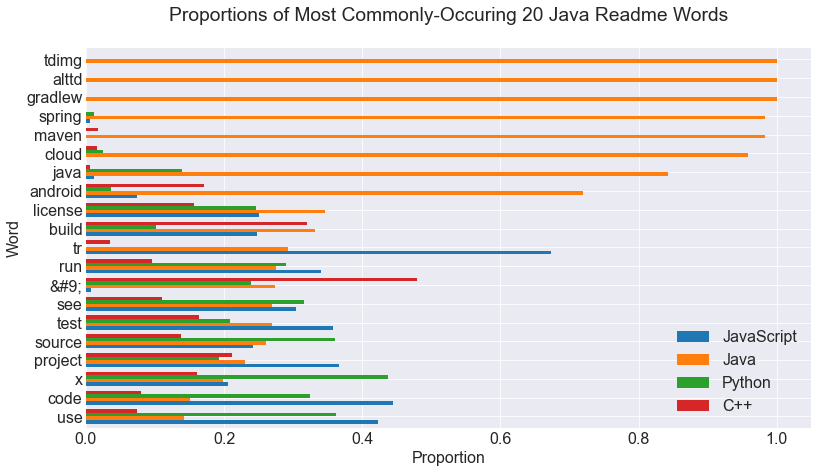

<Figure size 1152x648 with 0 Axes>

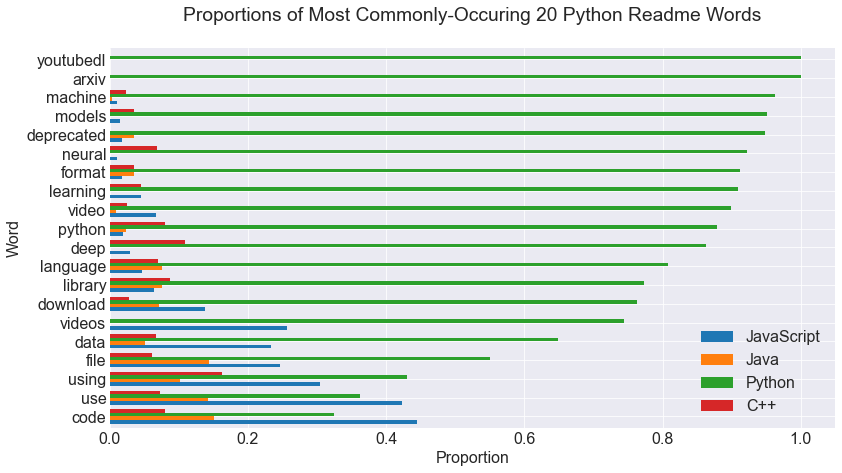

<Figure size 1152x648 with 0 Axes>

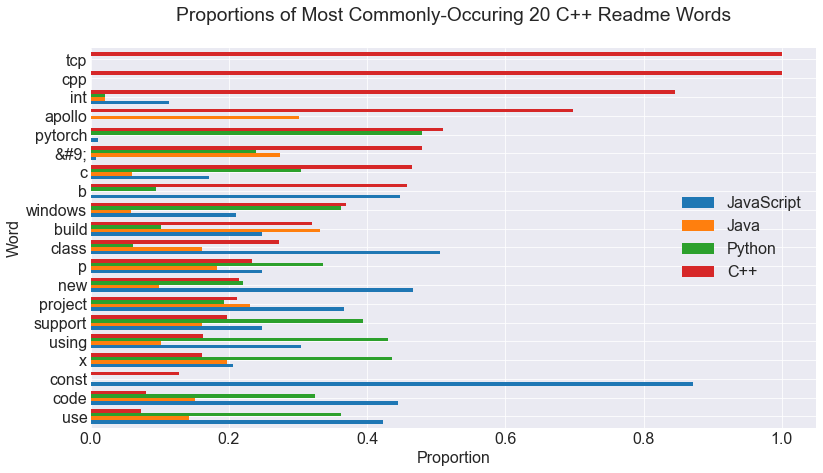

In [29]:
for language in languages:
    e.plot_horizontal_bar(word_counts, language);